In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.16.1


In [14]:
df = pd.read_csv('wine.csv')

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [17]:
df.shape

(1599, 12)

In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoder = LabelEncoder()

In [23]:
df['quality'] = encoder.fit_transform(df['quality'])

In [24]:
X = df.drop('quality', axis=1)
y = df['quality']

In [25]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training Set Dimensions:", X_train.shape, y_train.shape)
print("Validation Set Dimensions:", X_val.shape, y_val.shape)
print("Test Set Dimensions:", X_test.shape, y_test.shape)

Training Set Dimensions: (1119, 11) (1119,)
Validation Set Dimensions: (240, 11) (240,)
Test Set Dimensions: (240, 11) (240,)


In [26]:
# Scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [27]:
# Designing the network layers
input_dim = X_train.shape[1]

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=input_dim),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\Smita\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Set the loss function, optimizer, and metrics
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [30]:
# Fit the model to the training data
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5807 - loss: 0.6713 - val_accuracy: 0.7042 - val_loss: 0.5734
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7295 - loss: 0.5643 - val_accuracy: 0.7333 - val_loss: 0.5119
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7292 - loss: 0.5357 - val_accuracy: 0.7583 - val_loss: 0.4926
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.5142 - val_accuracy: 0.7542 - val_loss: 0.4872
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7532 - loss: 0.5267 - val_accuracy: 0.7542 - val_loss: 0.4833
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7605 - loss: 0.5042 - val_accuracy: 0.7625 - val_loss: 0.4798
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.5054 - val_accuracy: 0.7708 - val_loss: 0.4781
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7687 - loss: 0.4912 - val_accuracy: 0.7750 - val_loss

In [31]:
# Get model parameters
weights, biases = model.layers[0].get_weights()
print("Weights of first layer:\n", weights)
print("Biases of first layer:\n", biases)

Weights of first layer:
 [[ 0.13557015  0.1351302  -0.00390025 -0.14222416  0.20379008 -0.05193869
  -0.22097573  0.16464253  0.10985965  0.2550754   0.14264561 -0.29224807
  -0.15236391  0.10587506 -0.10637821  0.25948864  0.07096634 -0.20548956
  -0.3239036   0.25692043 -0.34164557  0.16007583 -0.2717092  -0.21745928
  -0.08497555 -0.06390712  0.20725061  0.15558213  0.10027254 -0.10213365
   0.28727144  0.13296698  0.13779376  0.15433624 -0.06896381 -0.11611823
  -0.3031031  -0.10274228 -0.02096332  0.16903163 -0.20183755 -0.11061569
   0.01277715  0.17450505  0.09435456  0.07929926 -0.24778643  0.1197215
   0.13766764  0.25889122  0.10789455  0.24260522 -0.19718651 -0.25334847
  -0.19397312  0.10660138  0.16333255 -0.3144163  -0.20061547 -0.08396553
   0.234417   -0.27834073  0.23472509  0.10191036]
 [ 0.270758   -0.2454661  -0.13309549  0.27436066  0.1988754  -0.3402751
   0.18376149 -0.03567244 -0.08533259  0.06734437 -0.02201021 -0.36528918
  -0.1328211   0.21473728  0.3985157  

In [32]:
# Store training history in a DataFrame
history_df = pd.DataFrame(history.history)
print(history_df.head())

   accuracy      loss  val_accuracy  val_loss
0  0.645219  0.644083      0.704167  0.573406
1  0.722967  0.562467      0.733333  0.511907
2  0.745308  0.526887      0.758333  0.492624
3  0.745308  0.512684      0.754167  0.487247
4  0.761394  0.503240      0.754167  0.483318


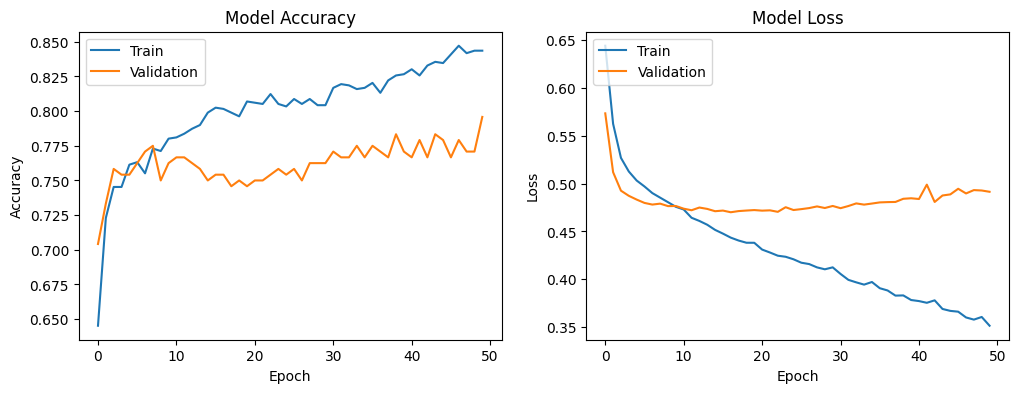

In [33]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [34]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate classification report
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5680 
Test Loss: 0.5197933912277222
Test Accuracy: 0.7458333373069763
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       112
           1       0.78      0.73      0.76       128

    accuracy                           0.75       240
   macro avg       0.75      0.75      0.75       240
weighted avg       0.75      0.75      0.75       240

